/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Natural Spawners Excluding Jacks' 'Contact Agency' 'Terminal Harvest'
 'Mainstem Harvest' 'Ocean Harvest']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


(4662, 221)
(1998, 221)
(4662,)
(1998,)
0.5328366391744709
0.49101491999229163


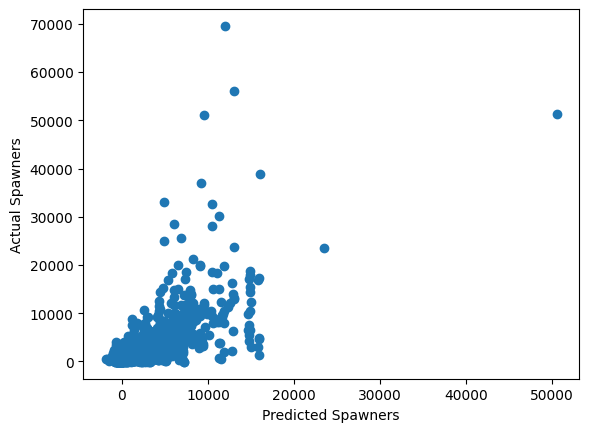

MAE 2787.820123969641
RMSE 4644.124752384754
                            OLS Regression Results                            
Dep. Variable:     Number of Spawners   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     29.24
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:                -43559.
No. Observations:                4662   AIC:                         8.747e+04
Df Residuals:                    4486   BIC:                         8.861e+04
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

salmon = pd.read_csv('SPS_Status Review 2015.csv')

#Dropping NA for critical rows used in model
salmon = salmon.replace({'-99': pd.NA, 'late-run': 'late fall', 'winter': 'winter-run'})
salmon = salmon.dropna(subset = ['Number of Spawners'])

#Dummies
salmon = pd.get_dummies(salmon, columns=['Common Population Name',  'Recovery Domain',
                                        'ESU Name', 'Species', 'Run', 'Major Population Group'], drop_first = True)

#Declare variables
independent = [i for i in salmon.columns if i not in ['Number of Spawners', 'End Year', 'Start Year', 'NWR Population Name']]
dependent = 'Number of Spawners'
X = salmon[independent]
y = salmon[dependent]

#Imputer to fix NaN issues (stackoverflow)
imputer = SimpleImputer(strategy = 'mean')
X = imputer.fit_transform(X)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Fit model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

#Plot
plt.scatter(model.predict(X_test), y_test)
plt.xlabel('Predicted Spawners')
plt.ylabel('Actual Spawners')
plt.show()

#Error, MAE, RMSE
#Convert to df to manipulate data (stackoverflow)
X_test_df = pd.DataFrame(X_test, columns = independent[:X_test.shape[1]])
X_test_df.dropna()
X_test_df['preds'] = model.predict(X_test)
X_test_df['actual spawners'] = y_test
X_test_df["Error"] = X_test_df['preds'] - X_test_df['actual spawners']
X_test_df["MAE"] = X_test_df["Error"].abs()
X_test_df["RMSE"] = X_test_df["Error"] ** 2
print("MAE", X_test_df["MAE"].mean())
print("RMSE", (X_test_df["RMSE"].mean())**(1/2))

#Print Regression
smOLS_int = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(smOLS_int.summary())